# Plotting the trajectories of cells in the CD4 differentation example

This notebook will explain how to reproduce the figure 3C et 3D representing the trajectory of the cells.
To do this, we use a modified version of PhysiCOOL, available at https://github.com/marcorusc/PhysiCOOL. 
More information about PhysiCOOL can be found in their publication : https://gigabytejournal.com/articles/77.

In [1]:
%matplotlib inline
from physicool.processing import get_cell_trajectories
from physicool.processing import get_cell_data
from physicool.plotting import plot_trajectories_3d, plot_trajectories_2d
from physicool import optimization as opt
from matplotlib import pyplot as plt
import os, shutil

First, we change the working directory to the root folder of PhysiCell

In [2]:
os.chdir("../../../../")

And we remote the existing temp simulation folder if it exists

In [3]:
if os.path.exists("temp"):
    shutil.rmtree("temp")

We then use PhysiCOOL to simulate the default settings

In [4]:
my_model = opt.PhysiCellBlackBox(project_name="project", project_config=" ./config/differentiation/PhysiCell_settings.xml")
my_model.run(
    keep_files=True
)

Starting the replicates


Finally we generate the plot, and save it as PNG. 

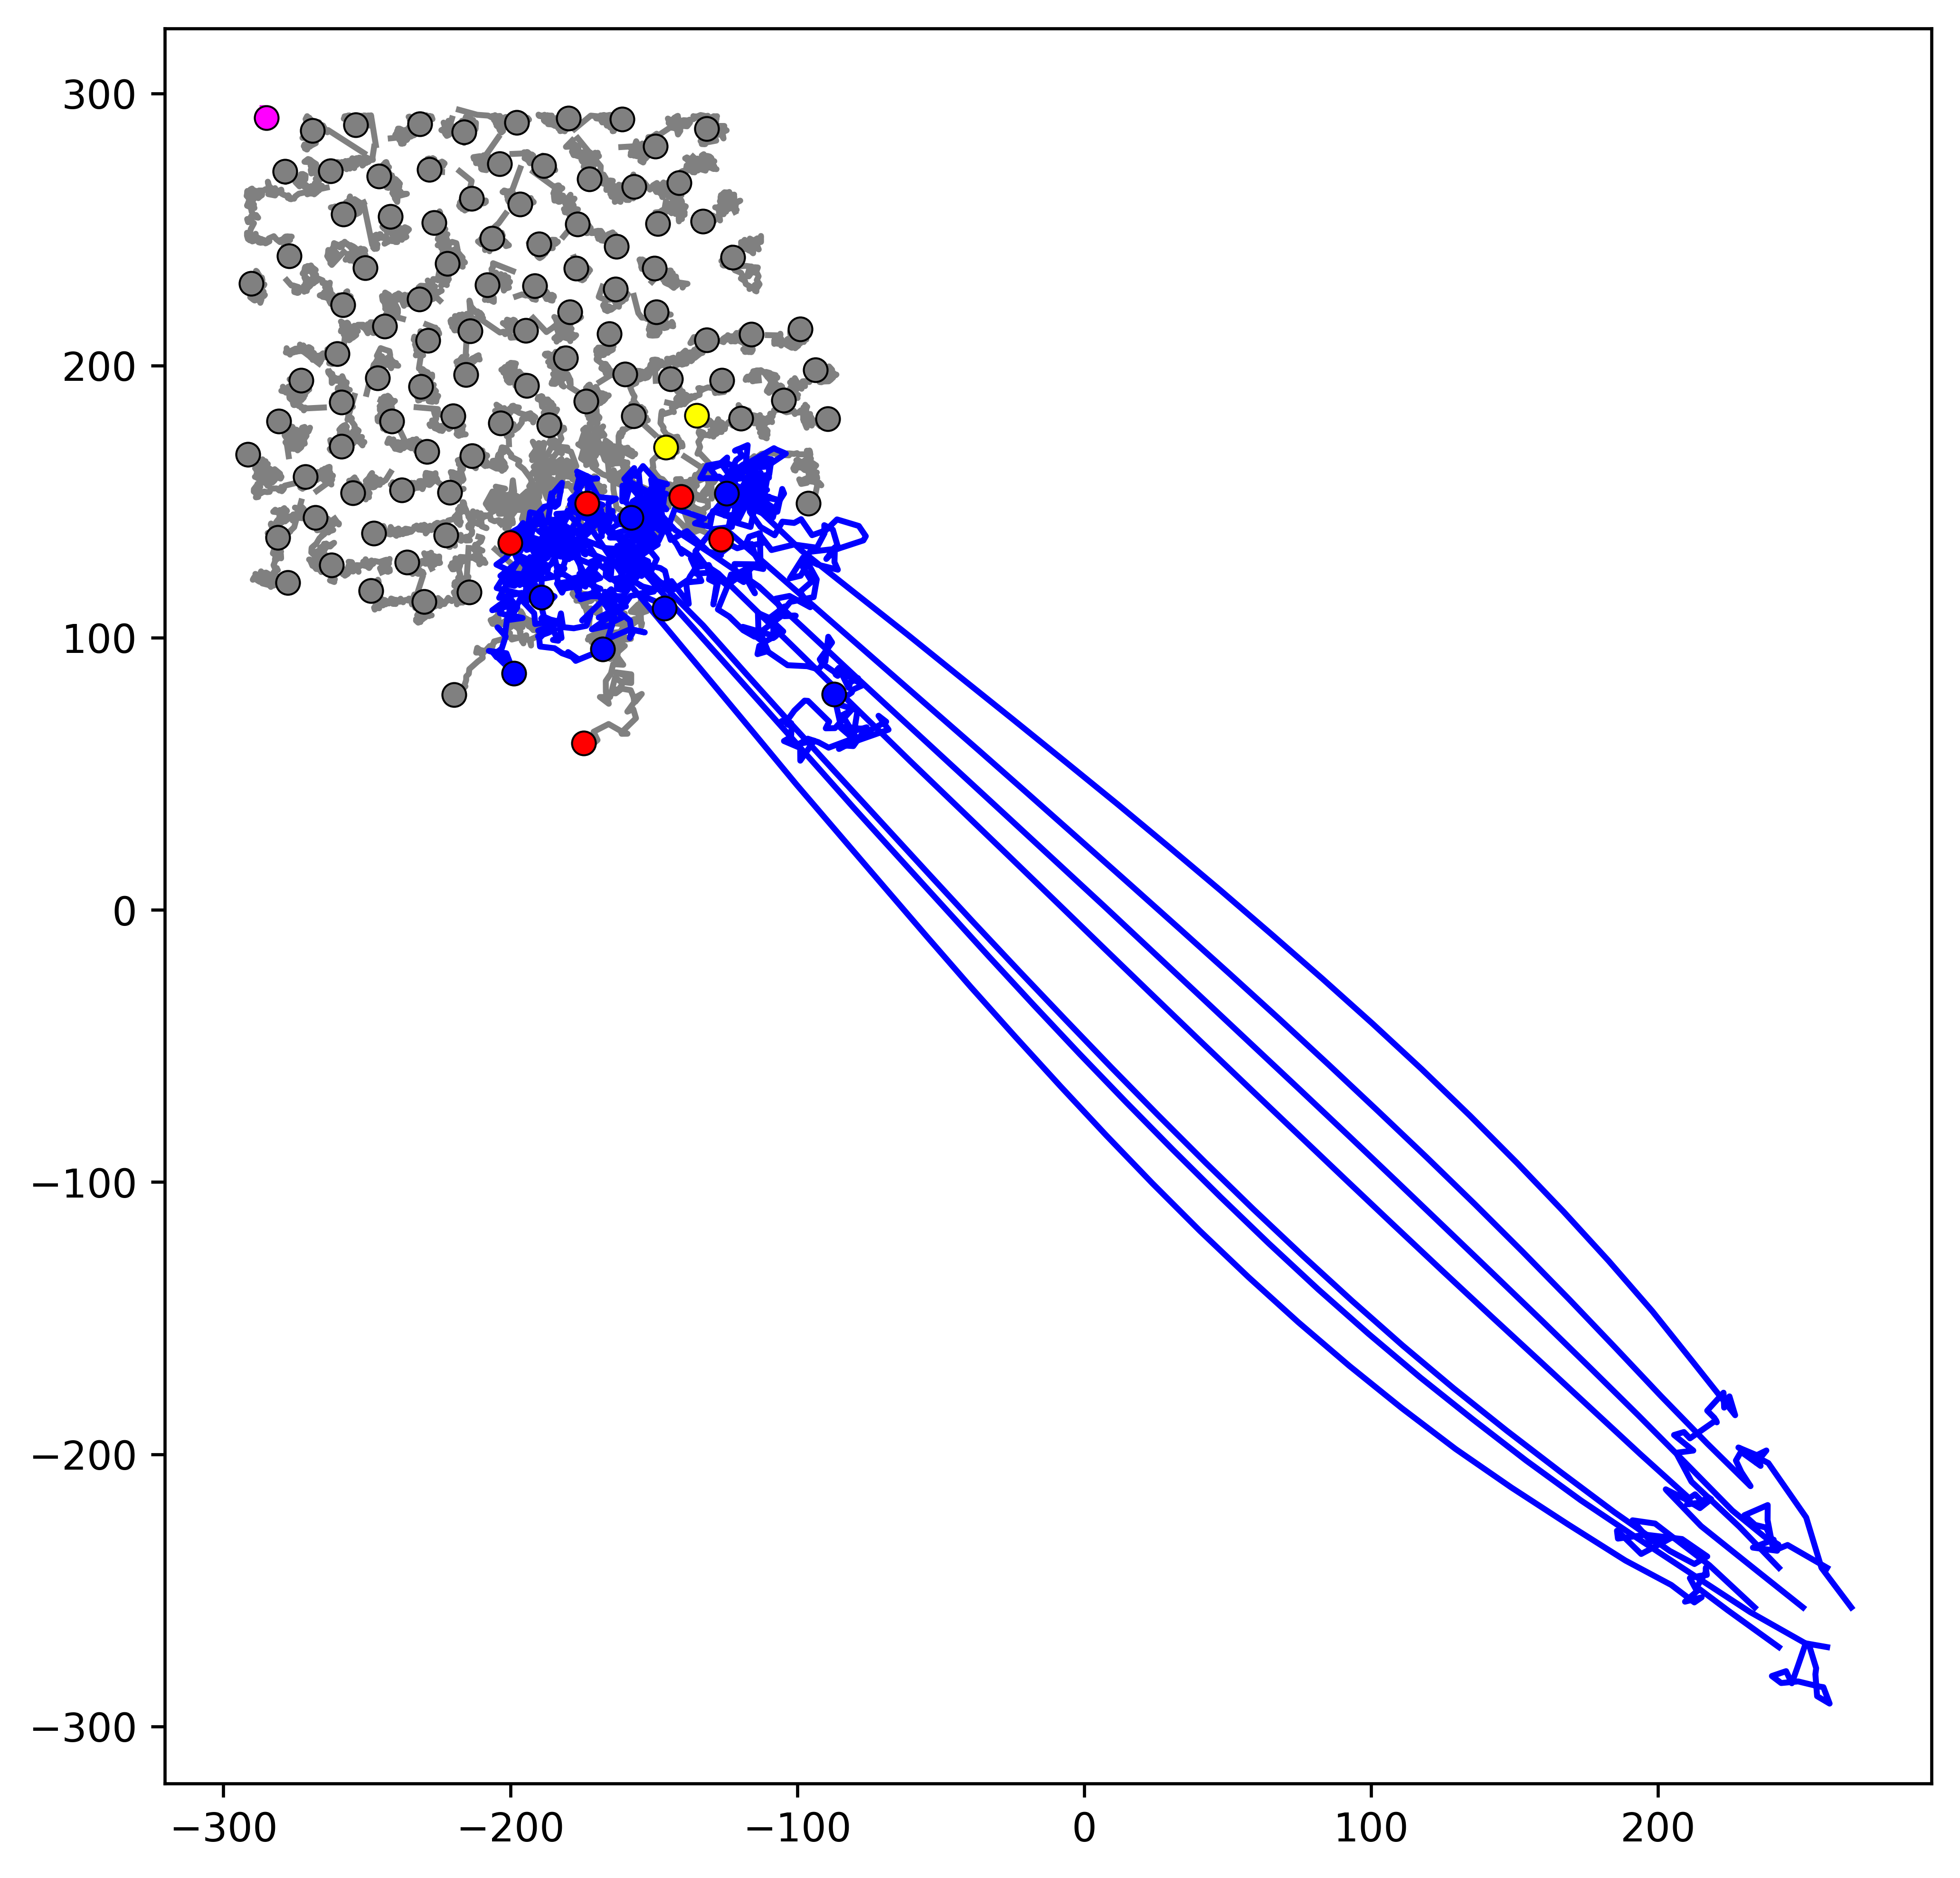

In [5]:
trajectories = get_cell_trajectories("temp")
plot_trajectories_2d(trajectories)
plt.savefig("differentiation.png", dpi=600)

Now we're going to simulate the example with a migration closer to a random walk. 
First, we remote the old simulation files.

In [6]:
if os.path.exists("temp"):
    shutil.rmtree("temp")

Then we simulate with the settings for the lower migration bias.

In [7]:
my_model = opt.PhysiCellBlackBox(project_name="project", project_config=" ./config/differentiation/PhysiCell_settings_lower_bias.xml")
my_model.run(
    keep_files=True
)

Starting the replicates


Again, we generate the plot and save it as a PNG file. 

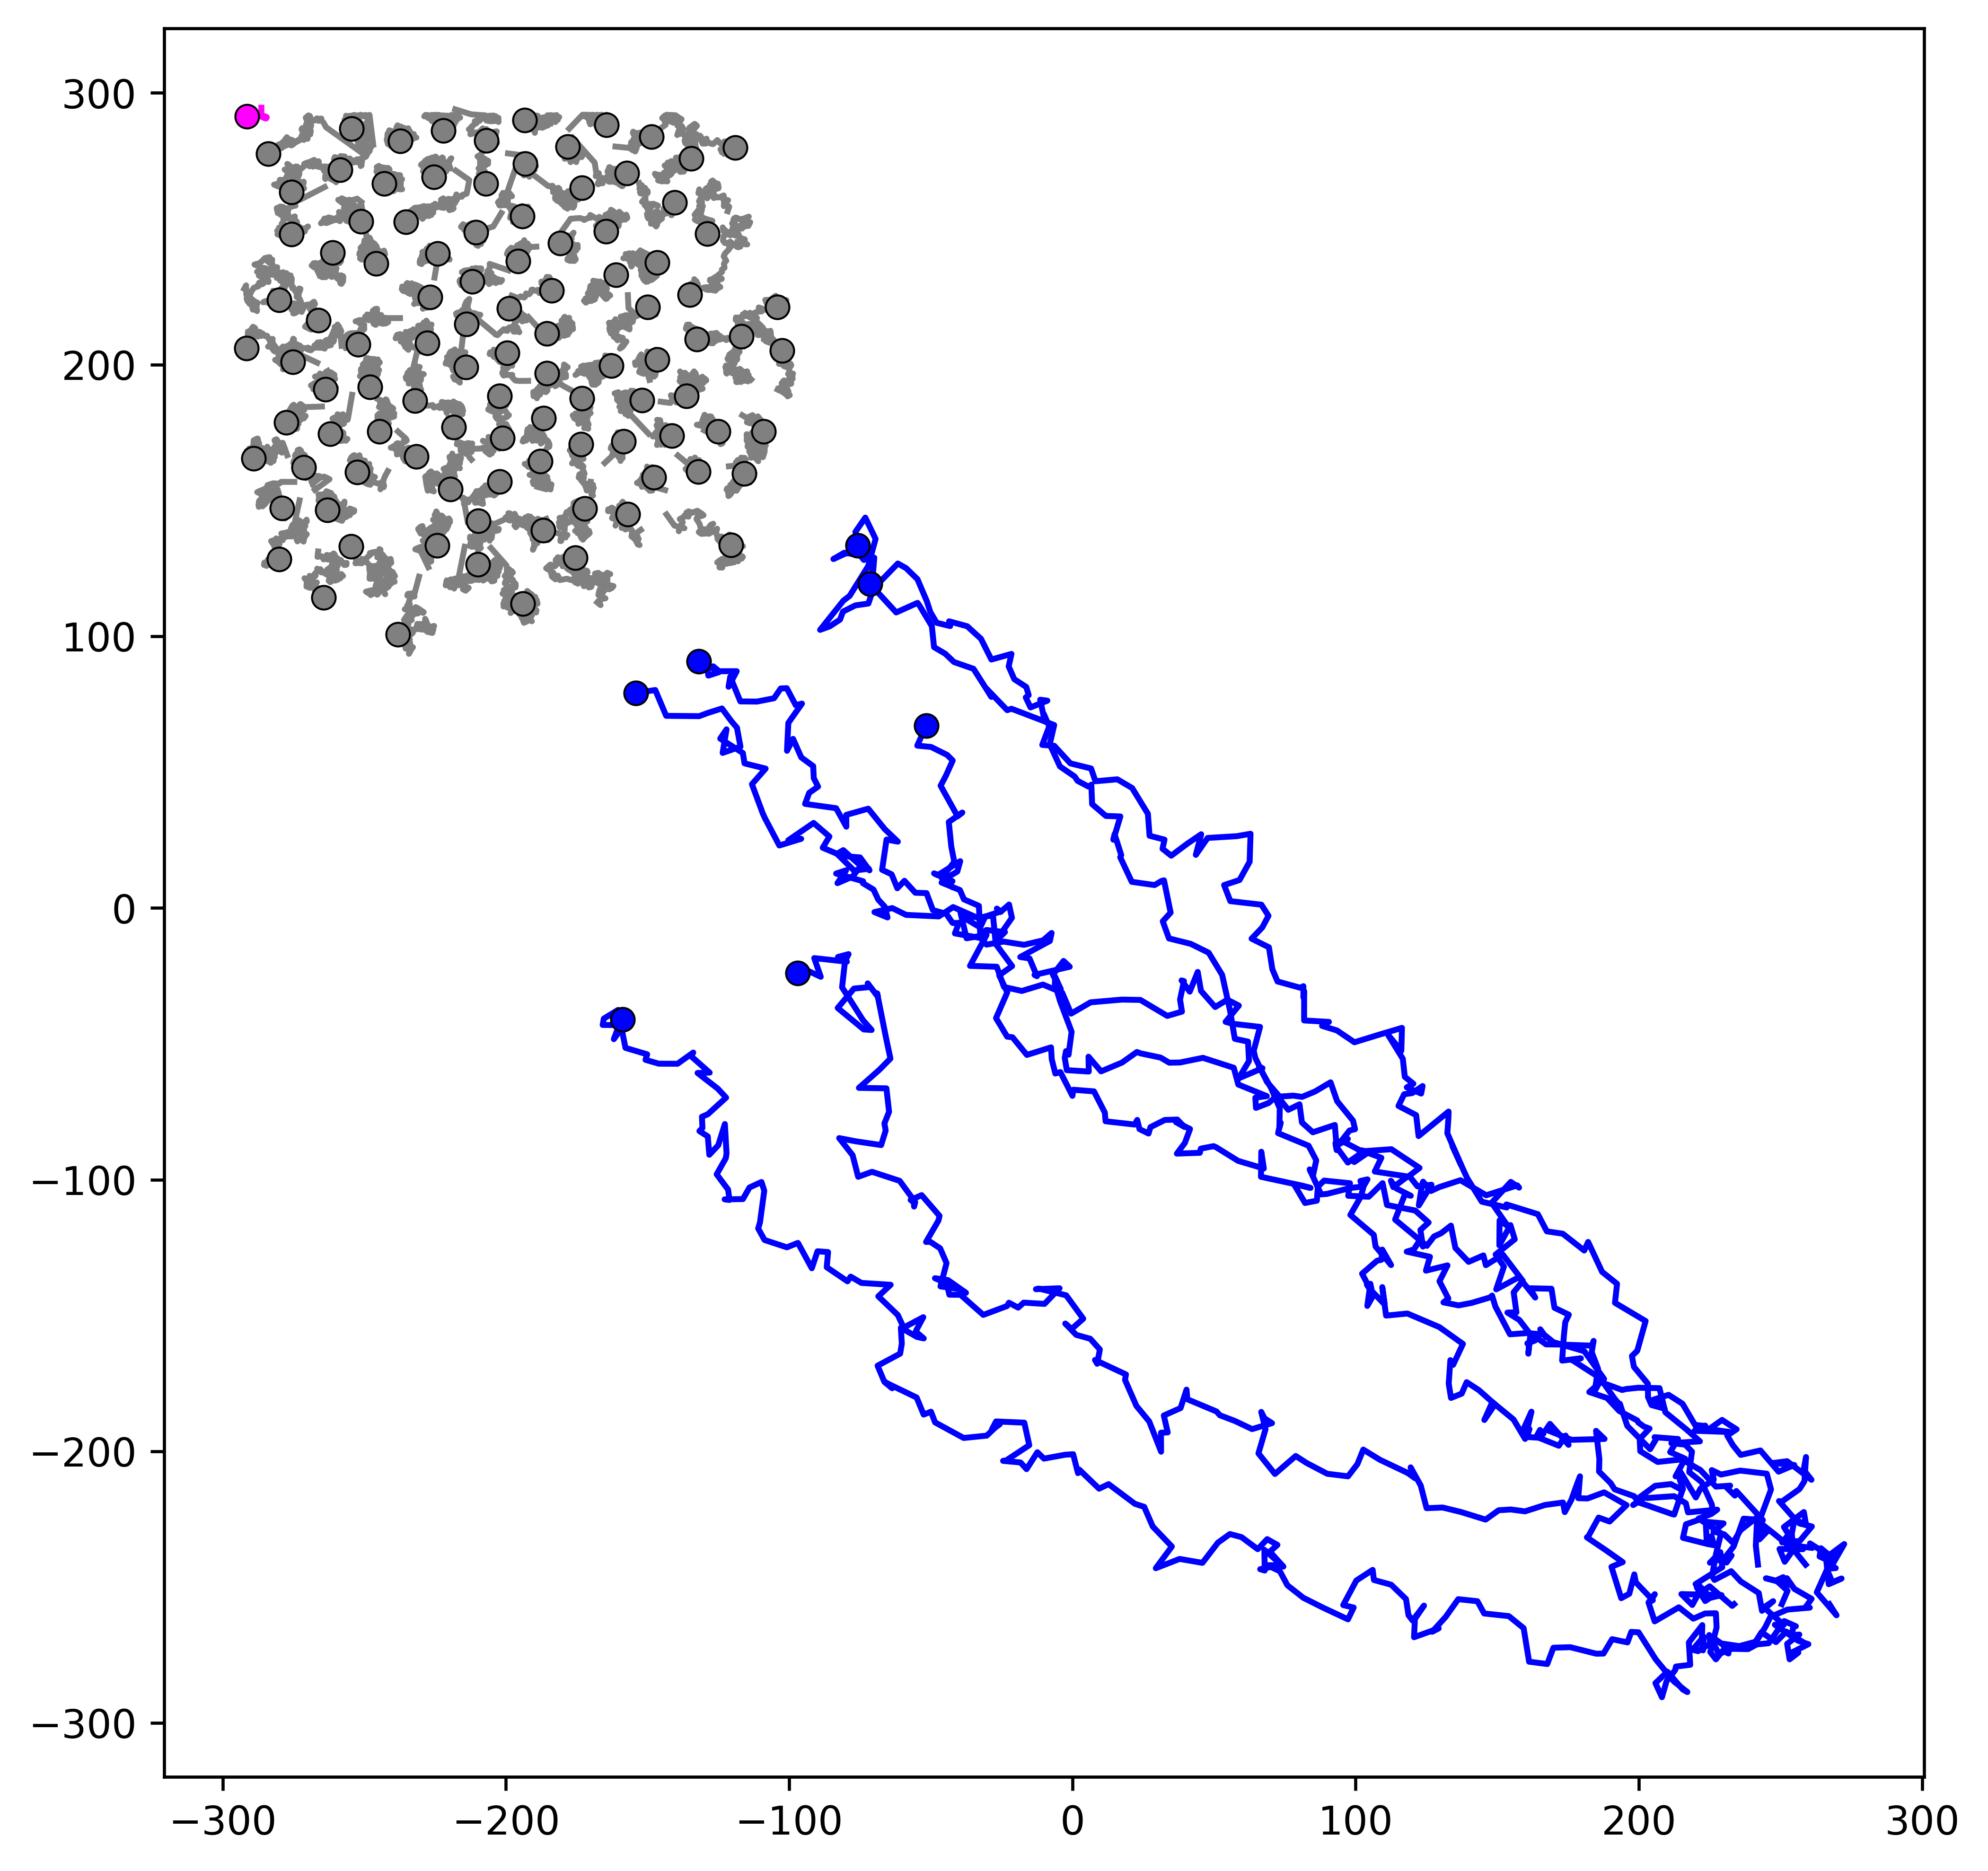

In [8]:
trajectories = get_cell_trajectories("temp")
plot_trajectories_2d(trajectories)
plt.savefig("differentiation_lower_bias.png", dpi=600)